In [2]:
rain.data <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)

In [3]:
rain.ts <- ts(rain.data, start=c(1813))


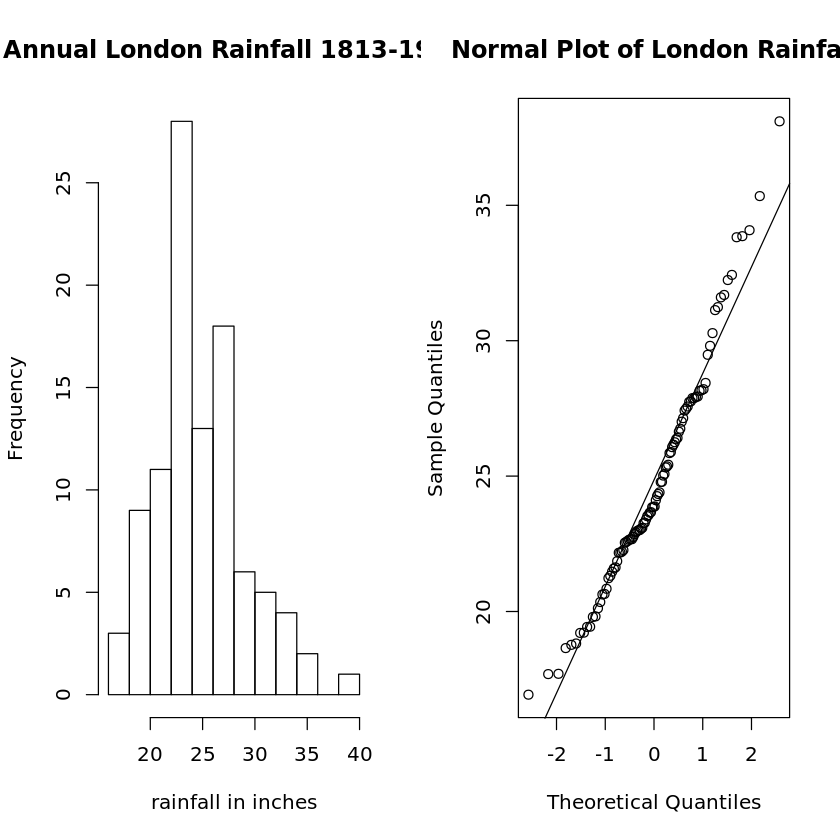

In [4]:
par( mfrow=c(1,2) )
hist(rain.data, main="Annual London Rainfall 1813-1912",
xlab="rainfall in inches")
qqnorm(rain.data,main="Normal Plot of London Rainfall")
qqline(rain.data)

## not quite normally distributed. Looks like a systematic departure from normality, but nothing too extreme.

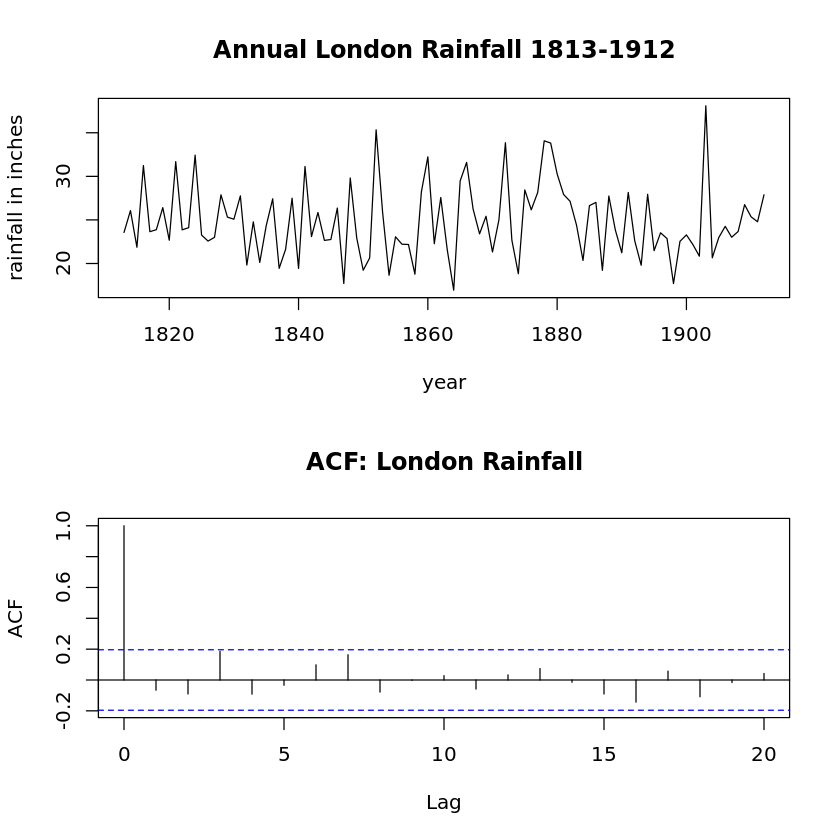

In [5]:
par( mfrow=c(2,1) )
plot.ts(rain.ts, main="Annual London Rainfall 1813-1912",
xlab="year", ylab="rainfall in inches")
acf(rain.ts, main="ACF: London Rainfall")


## looking at that data set, I'm kind of seeing noise. I really can't make myself see much of a structure in that data set.

## We will try auto arima to see if it fits any model

In [9]:
install.packages("forecast")
library(forecast)
auto.arima(rain.ts)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘tseries’, ‘fracdiff’, ‘lmtest’, ‘zoo’, ‘timeDate’, ‘RcppArmadillo’

Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”

Series: rain.ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
         mean
      24.8239
s.e.   0.4193

sigma^2 estimated as 17.76:  log likelihood=-285.25
AIC=574.49   AICc=574.61   BIC=579.7

## Even auto arima is not giving any proper output 

In [10]:
alpha=.2 #increase alpha for more rapid decay
forecast.values = NULL #establish array to store forecast values
n = length(rain.data)
#naive first forecast
forecast.values [1] = rain.data[1]

In [11]:
#loop to create all forecast values
for( i in 1:n ) {
forecast.values [i+1] = alpha*rain.data[i] + (1-alpha)* forecast.values [i]
}
paste("forecast for time",n+1," = ", forecast.values [n+1])


[1] "forecast for time 101  =  25.3094062064236"

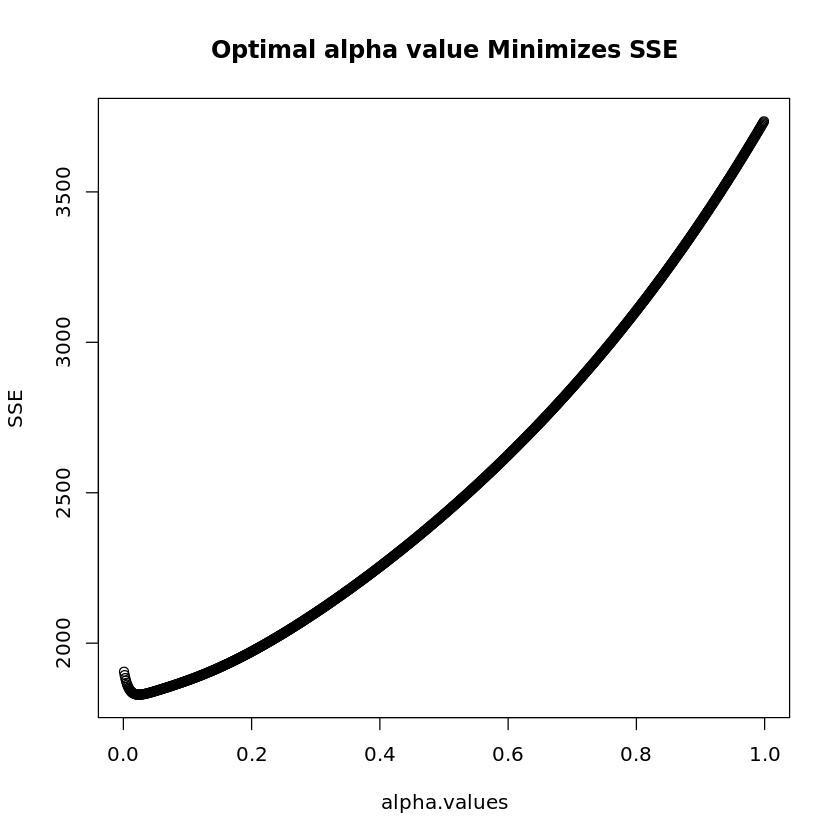

In [12]:
SSE=NULL
n = length(rain.data)
alpha.values = seq( .001, .999, by=0.001)
number.alphas = length(alpha.values)
for( k in 1:number.alphas ) {
 forecast.values=NULL
 alpha = alpha.values[k]
 forecast.values[1] = rain.data[1]
 for( i in 1:n ) {
 forecast.values[i+1] = alpha*rain.data[i] + (1-alpha)*forecast.values[i]
 }
 SSE[k] = sum( (rain.data - forecast.values[1:n])^2 )
}
plot(SSE~alpha.values, main="Optimal alpha value Minimizes SSE")

In [13]:
index.of.smallest.SSE = which.min(SSE) #returns position 24
alpha.values[which.min(SSE)] #returns 0.024

[1] 0.024

In [14]:
HoltWinters(rain.ts, beta=FALSE, gamma=FALSE)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain.ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819